In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Input
import keras
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../input/google/google.csv",index_col = 0)

In [3]:
df.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2004-08-19,49.813286,51.835709,47.800831,49.982655,44871300,0,0.0
2004-08-20,50.316402,54.336334,50.062355,53.952770,22942800,0,0.0
2004-08-23,55.168217,56.528118,54.321388,54.495735,18342800,0,0.0
2004-08-24,55.412300,55.591629,51.591621,52.239193,15319700,0,0.0
2004-08-25,52.284027,53.798351,51.746044,52.802086,9232100,0,0.0


In [4]:
def make_data(df,win):
    k = 0
    x = []
    y = []
    while (k+win<len(df)-1):
        xa = df[k:k+win]
        ya = df[k+win+1]
        x.append(xa)
        y.append(ya)
        k+=1
    
    x = np.array(x)
    y = np.array(y)

    return x,y

In [5]:
def split_data(x,y):
    return train_test_split(x,y,test_size = 0.2,shuffle = False)

In [6]:
req_df = df['Open']
scaler = MinMaxScaler(feature_range= (0,1))
req_df = scaler.fit_transform(np.array(req_df).reshape(-1,1))

In [7]:
win = 10
x,y = make_data(req_df,win)
train_x,test_x,train_y,test_y = split_data(x,y)
train_x = train_x.reshape(train_x.shape[0],win,1)
test_x = test_x.reshape(test_x.shape[0],win,1)
print(train_x.shape)
print(test_y.shape)
print(train_y.shape)
print(test_x.shape)

(3272, 10, 1)
(819, 1)
(3272, 1)
(819, 10, 1)


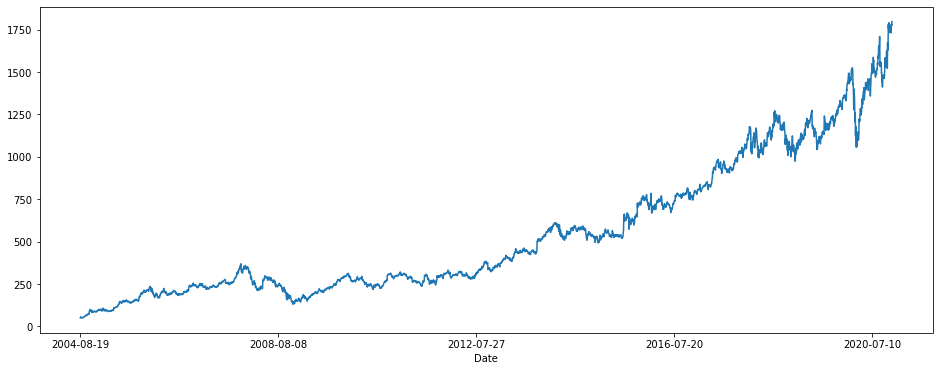

In [8]:
df['Open'].plot(figsize = (16,6))

In [9]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(win,1)))
model.add(Dropout(0.2))
model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 10, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 5

In [11]:
model.fit(train_x,train_y,validation_data = (test_x,test_y),batch_size = 32, epochs = 100,verbose = 1)

Epoch 1/100
103/103 [==============================] - 2s 18ms/step - loss: 0.0031 - val_loss: 0.0019
Epoch 2/100
103/103 [==============================] - 1s 7ms/step - loss: 5.5148e-04 - val_loss: 0.0016
Epoch 3/100
103/103 [==============================] - 1s 7ms/step - loss: 4.5523e-04 - val_loss: 0.0030
Epoch 4/100
103/103 [==============================] - 1s 6ms/step - loss: 4.7489e-04 - val_loss: 0.0014
Epoch 5/100
103/103 [==============================] - 1s 6ms/step - loss: 4.0077e-04 - val_loss: 0.0011
Epoch 6/100
103/103 [==============================] - 1s 6ms/step - loss: 3.4728e-04 - val_loss: 0.0012
Epoch 7/100
103/103 [==============================] - 1s 6ms/step - loss: 3.7660e-04 - val_loss: 0.0012
Epoch 8/100
103/103 [==============================] - 1s 7ms/step - loss: 3.5166e-04 - val_loss: 0.0030
Epoch 9/100
103/103 [==============================] - 1s 7ms/step - loss: 3.3393e-04 - val_loss: 0.0020
Epoch 10/100
103/103 [==============================] - 1s

In [12]:
scaled_pred = model.predict(test_x)

In [13]:
pred = scaler.inverse_transform(scaled_pred)

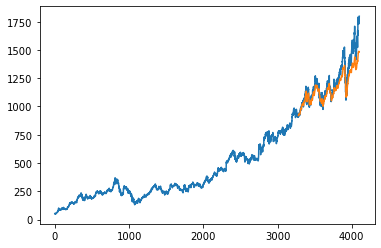

In [14]:
org_data = np.array(df['Open'])
pred_x = np.arange(int(.8*len(df)),len(org_data)-2)
org_x = np.arange(len(req_df))
plt.plot(org_x,df['Open'])
plt.plot(pred_x,pred)
plt.show()

In [15]:
mean_squared_error(scaled_pred,test_y)

0.0028187853883312637

In [16]:
org_x.shape,df['Open'].shape

((4102,), (4102,))